# Vehicle Detect-Count


In this project, I worked on detecting and counting vehicles in a given image or a video. I used OpenCV for image processing and Haar cascade which is used for object detection. We can also create our own customized haar cascade classifier. 

In [1]:
# Import libraries
from PIL import Image
import cv2
import numpy as np
import requests  

Importing required libraries.

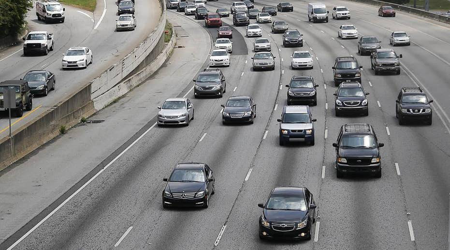

In [2]:
# Reading image form url
image = Image.open(requests.get('https://a57.foxnews.com/media.foxbusiness.com/BrightCove/854081161001/201805/2879/931/524/854081161001_5782482890001_5782477388001-vs.jpg', stream=True).raw)
image = image.resize((450,250))
image_arr = np.array(image)
image

Next I fetched the image from the internet that I will be working on. I then resized the image and converted it into a numpy array.

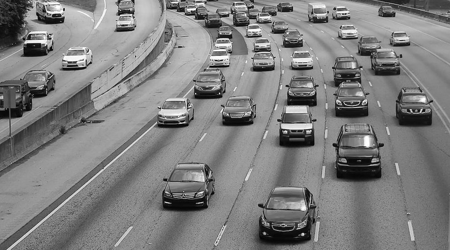

In [ ]:
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

Now in order to get better output, I performed some transformations on the image. Here we will convert the image into grayscale. 

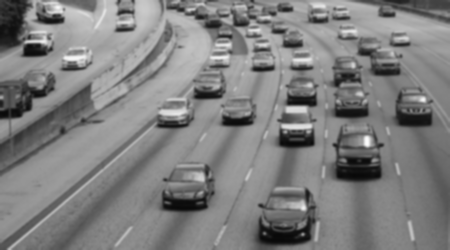

In [ ]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

Next I applied GaussianBlur to remove the noise from the image. Instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used. It is done with the function, cv2.GaussianBlur(). I specified the width and height of the kernel which should be positive and odd. 

In [ ]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

Here we will dilate image. It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. 

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

Now I performed Morphology transformation with kernel. MorphologyEx is used to find the difference between dilation and erosion of an image.
I may need elliptical/circular shaped kernels. So for this purpose, OpenCV has a function, cv2.getStructuringElement(). I just passed the shape and size of the kernel to get the desired kernel.

In [ ]:
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)

Now I need car cascade to detect cars. So, I first need to upload them to collab and then specify the path to car_cascade_src. OpenCV provides a training method (see Cascade Classifier Training) or pretrained models, that can be read using cv2.CascadeClassifier() method. i need to detect multiple objects i.e. cars so we will use detectMultiScale. Detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles.

22  cars found


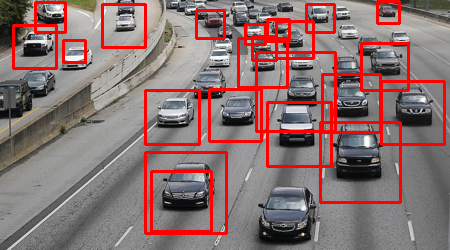

In [ ]:
cnt = 0
for (x,y,w,h) in cars:
  cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
  cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)

Now I will use the above returned contours and draw a rectangle around detected cars. Here I will see that it will create the rectangle with red boundary around each and every car it detects.

In [ ]:
# Reading image form url
image2 = Image.open(requests.get('https://qph.fs.quoracdn.net/main-qimg-b5c4e39dcd48dddd9e609e6022f74d85', stream=True).raw)
image2 = image2.resize((450,250))
image_arr2 = np.array(image2)
grey2 = cv2.cvtColor(image_arr2,cv2.COLOR_BGR2GRAY)

Now I will use another image i.e. bus image and I will fetch this image from the internet. I will resize the image and store it as a numpy array and also convert it into grayscale.

In [ ]:
bus_cascade_src = 'Bus_front.xml'
bus_cascade = cv2.CascadeClassifier(bus_cascade_src)
bus = bus_cascade.detectMultiScale(grey2, 1.1, 1)

As I am working with the bus image here so I require the cascade for detecting the bus. I will use Bus_front cascade to identify bus from the image. I will perform similar operation as performed above.

In [ ]:
cnt = 0
for (x,y,w,h) in bus:
  cv2.rectangle(image_arr2,(x,y),(x+w,y+h),(255,0,0),2)
  cnt += 1
print(cnt, " bus's found")
Image.fromarray(image_arr2)

As I did in car cascading similarly I will be performing the same contour operations on the bus image and create a rectangle around the bus if detected any.

In [ ]:
cascade_src = 'cars.xml'
video_src = 'Cars.mp4'

cap = cv2.VideoCapture(video_src)
car_cascade = cv2.CascadeClassifier(cascade_src)
video = cv2.VideoWriter('result.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, (450,250))       

Now I will perform the vehicle detection and counting in a video. For creating the output video from frames or images we need cv2.VideoWriter() method. It take path with extension as first parameter, second parameter is the codec for output format, then we also need to pass frames per second and height and width. 

In [ ]:
while True:
    ret, img = cap.read()
   
    if (type(img) == type(None)):
        break
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cars = car_cascade.detectMultiScale(gray, 1.1, 2)

    for (x,y,w,h) in cars:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)

    video.write(img) 
video.release()

Now I will read frames one by one from the input video, convert them into grayscale and using car cascade to detect all cars in that particular frame. In the end I wrote this video using video.write() method and video.release() will save this video to the given path. 

# Conclusion:

I started with downloading the image we will be working on and performed different operations on that image. I saw how I can use haar cascade which is used for object detection. I saw how different haar cascade is used for car detection, bus detection. Similarly, we can use many pretrained haar cascades for different object detection.

## Scope:

As haar cascade is used for object detection we have a very vast scope for this project. It can be used for any type of object detection. We can also create our own custom haar cascade for specific object.